In [15]:
import matplotlib.pyplot as plt
import librosa
import h5py
import numpy as np

In [36]:
path = 'C:\\Users\\CSANT321\\Documents\\TCC\\Datasets\\VSD_2014_December_official_release\\Hollywood-dev\\features\\FightClub_auditory.mat'

In [37]:
with h5py.File(path,'r') as file:
    # Extraia a matriz "mfcc" do dataset
    mfcc_data = file['MFCC'][:]
    # Converta a matriz para um array numpy
    mfcc_array = np.array(mfcc_data)

In [154]:
np.max(mfcc_array)

341.23872189428204

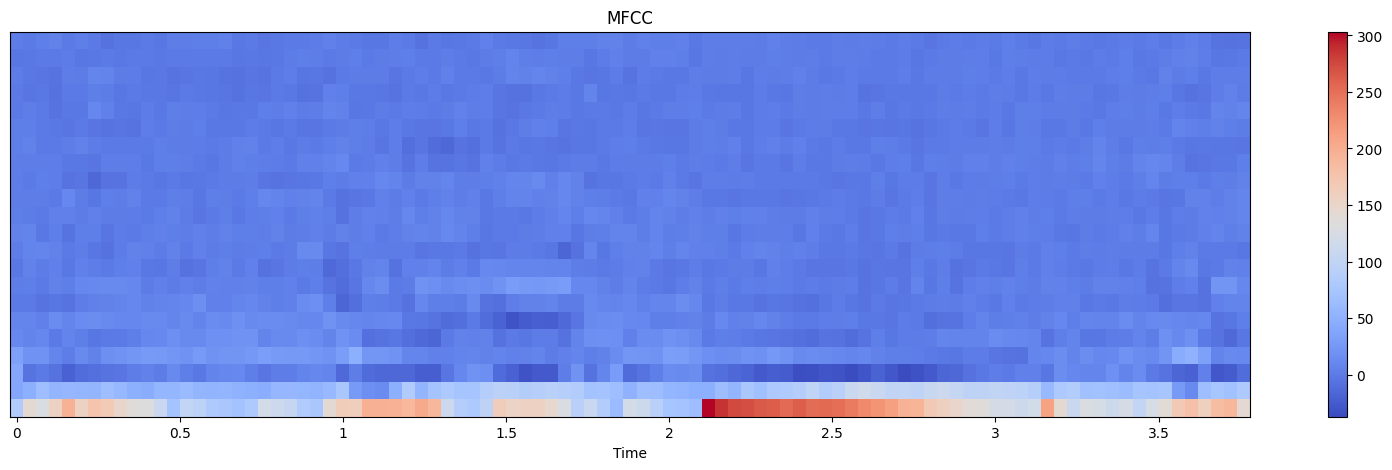

In [165]:
# Crie uma figura vazia
fig = plt.figure(figsize=(20, 5))

# Crie um eixo na figura
ax = fig.add_subplot(111)
n_amostras, n_coeficientes = mfcc_array.shape


def second_to_frame(second: int):
    return int(np.ceil(second*25))

s_i = second_to_frame(6105)
s_f = second_to_frame(6108.7789182)
# Exiba a imagem de mfcc_array no eixo
img = librosa.display.specshow(data = mfcc_array.T[:,s_i:s_f], 
                               sr=44100,
                               hop_length=1764,
                               win_length = 1764,
                               x_axis='time',
                               ax=ax)

# Adicione uma barra de cor à figura
fig.colorbar(img, ax=ax)

# Defina o título do eixo
ax.set_title('MFCC')

# Exiba a figura
plt.show()

In [166]:
y, sr = librosa.load('C:\\Users\\CSANT321\\Documents\\TCC\\Datasets\\HEAR Dataset\\AUDIO\\media\\tiago\\ESTUDO\\DataSets\\HEAR\\__BASE_HEAR_V2\\Audio\\Train\\VIOLENCIA\\soundscape_unimodal0.wav',
                     sr=44100)

In [167]:
mfccs = librosa.feature.mfcc(y=y,
                             sr=sr,
                             n_mfcc=22,
                             n_fft=1764,
                             hop_length=1764,
                             win_length = 1764,
                             )


# Calcular a energia de cada coeficiente MFCC
energia_mfccs = np.sum(np.square(mfccs), axis=0)

# Normalizar os MFCCs por energia
mfccs_normalizados = mfccs / np.sqrt(energia_mfccs)

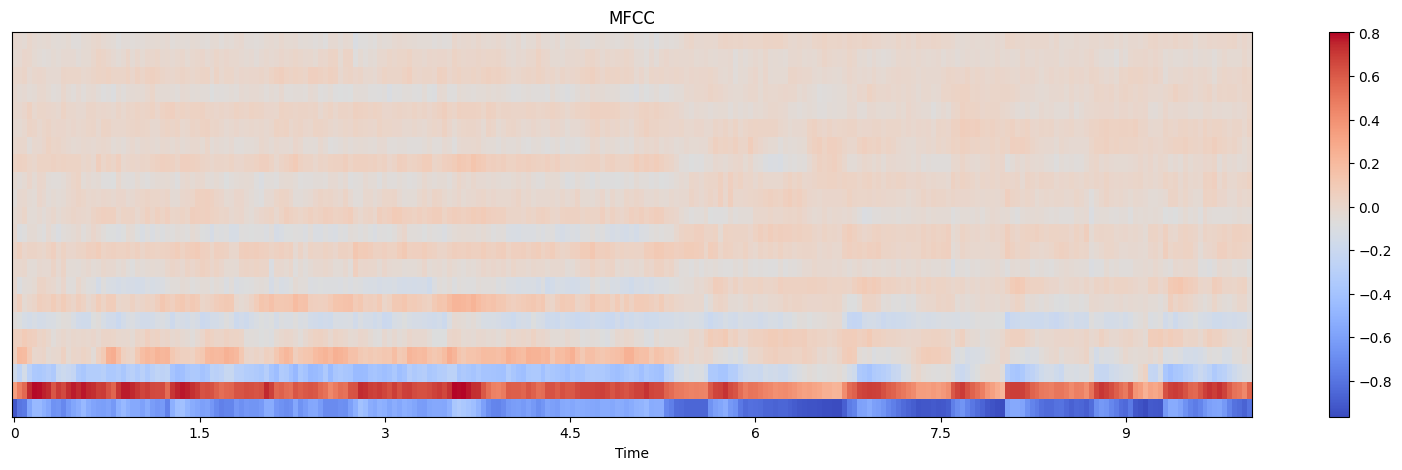

In [168]:
# Crie uma figura vazia
fig = plt.figure(figsize=(20, 5))

# Crie um eixo na figura
ax = fig.add_subplot(111)

img = librosa.display.specshow(data = mfccs_normalizados, 
                               sr=44100,
                               hop_length=1764,
                               win_length = 1764,
                               x_axis='time',
                               ax=ax)

# Adicione uma barra de cor à figura
fig.colorbar(img, ax=ax)

# Defina o título do eixo
ax.set_title('MFCC')

# Exiba a figura
plt.show()